In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Bonheur </h1>
</div>

In [2]:
# data = pd.read_excel("Rapport-bonheur2022.xls")
data = pd.read_csv("csv/rapportbonheur2019avecregion.csv")
data1 = pd.read_csv("csv/Unemployment.csv")
data2 = pd.read_csv('csv/bonheur_avec_meanyearschooling.csv')





In [3]:
data['mean_year_school_2019'] = data2['mean_year_school_2019']

In [4]:
# data1 = data1.drop(columns = ['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19','Unnamed: 21','Unnamed: 23','Unnamed: 25','Unnamed: 27','Unnamed: 29'])

In [5]:
data = data.rename(columns={"Happiness score" : "Score"})
data = data.rename(columns={"Country" : "Country or region"})
data = data.dropna()

In [6]:
data.shape

(144, 11)

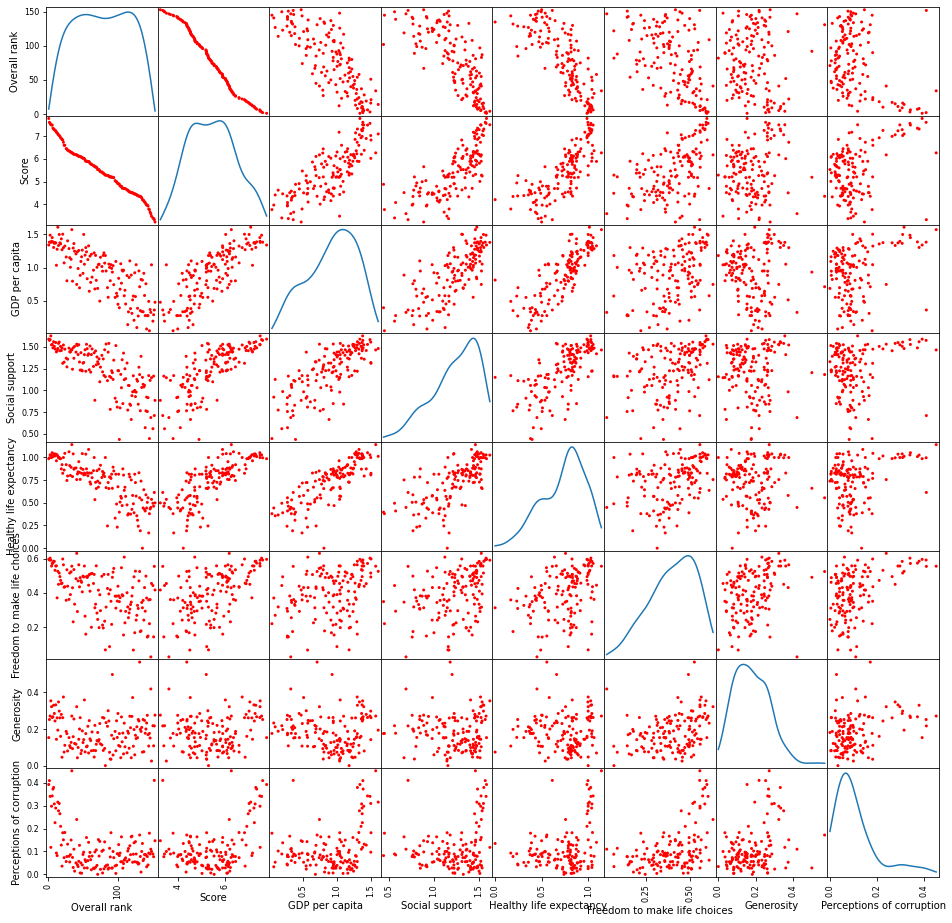

In [7]:
scatter_matrix(data.iloc[:,:], alpha = 1, figsize = (16, 16), diagonal = 'kde',color="red")
plt.show()

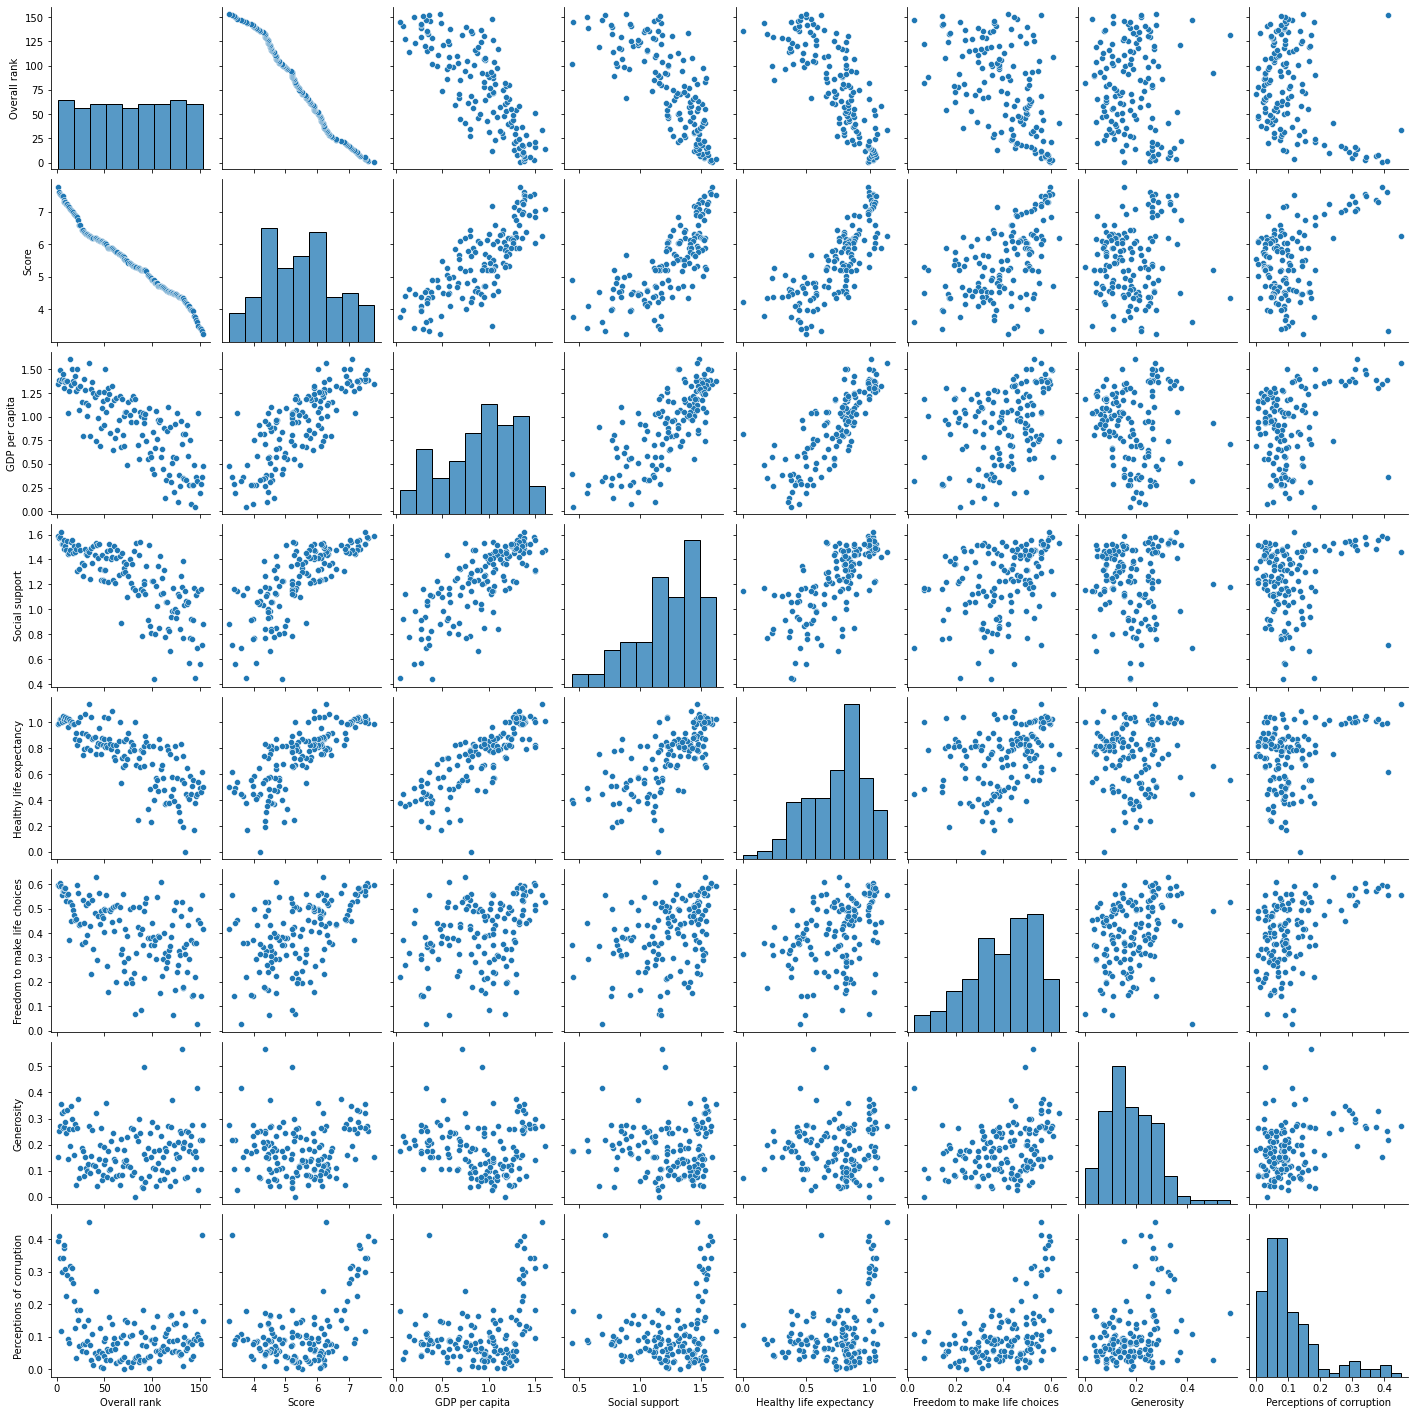

In [8]:
sns.pairplot(data)

<AxesSubplot:>

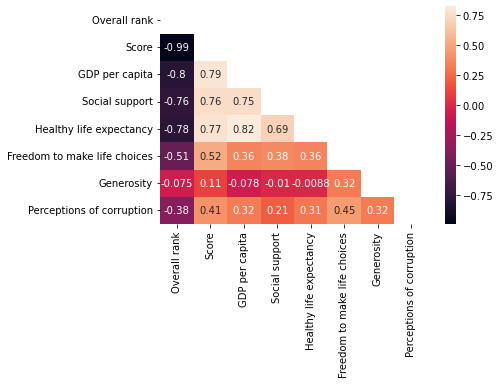

In [9]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask= matrix)

# Score

<AxesSubplot:xlabel='Score', ylabel='Country or region'>

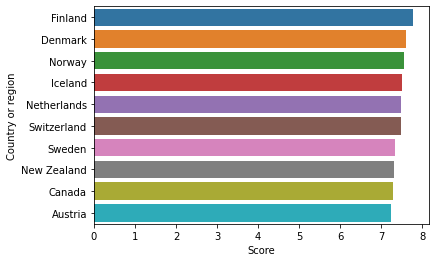

In [10]:
data1=data.sort_values(ascending = False, by=['Score'])
sns.barplot(x=data['Score'].head(10), y =data['Country or region'].head(10))

<AxesSubplot:xlabel='Score', ylabel='Country or region'>

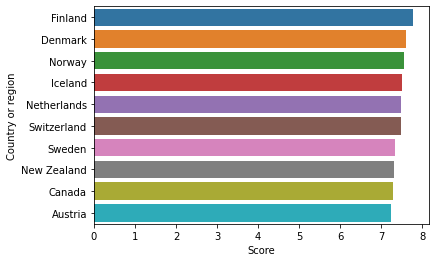

In [11]:
data1=data.sort_values(ascending = False, by=['Score'])
sns.barplot(x=data['Score'].head(10), y =data['Country or region'].head(10))

# Social support

<AxesSubplot:xlabel='Social support', ylabel='Country or region'>

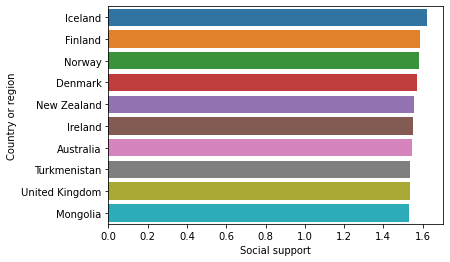

In [12]:
data1=data.sort_values(ascending = False, by=['Social support'])
sns.barplot(x=data1['Social support'].head(10), y =data1['Country or region'].head(10))

# Healthy life expectancy

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Country or region'>

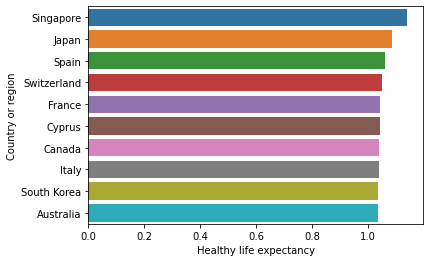

In [13]:
data1=data.sort_values(ascending = False, by=['Healthy life expectancy'])
sns.barplot(x=data1['Healthy life expectancy'].head(10), y =data1['Country or region'].head(10))

# GDP per capita

<AxesSubplot:xlabel='GDP per capita', ylabel='Country or region'>

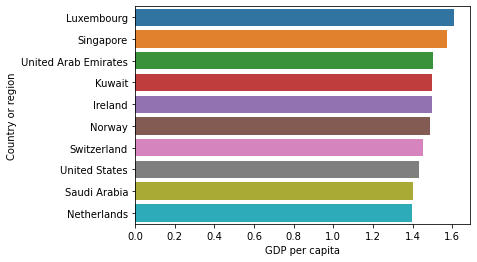

In [14]:
data1=data.sort_values(ascending = False, by=['GDP per capita'])
sns.barplot(x=data1['GDP per capita'].head(10), y =data1['Country or region'].head(10))

# Freedom to make life choices

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

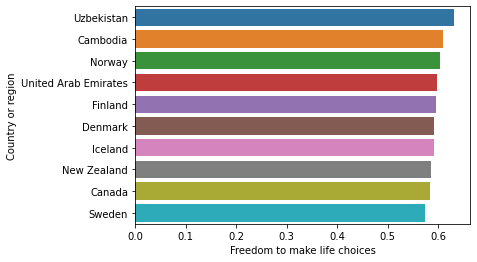

In [15]:
data1=data.sort_values(ascending = False, by=['Freedom to make life choices'])
sns.barplot(x=data1['Freedom to make life choices'].head(10), y =data1['Country or region'].head(10))

# Generosity

<AxesSubplot:xlabel='Generosity', ylabel='Country or region'>

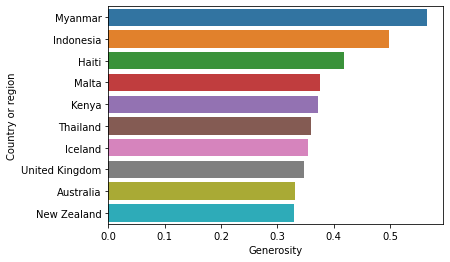

In [16]:
data1=data.sort_values(ascending = False, by=['Generosity'])
sns.barplot(x=data1['Generosity'].head(10), y =data1['Country or region'].head(10))

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">prediction année école</h1>
</div>

In [17]:
data_ecole = data.copy()

data_ecole

Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.769           1.340           1.587   
1               2           Denmark  7.600           1.383           1.573   
2               3            Norway  7.554           1.488           1.582   
3               4           Iceland  7.494           1.380           1.624   
4               5       Netherlands  7.488           1.396           1.522   
..            ...               ...    ...             ...             ...   
147           148          Botswana  3.488           1.041           1.145   
149           150            Malawi  3.410           0.191           0.560   
150           151             Yemen  3.380           0.287           1.163   
151           152            Rwanda  3.334           0.359           0.711   
152           153          Tanzania  3.231           0.476           0.885   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.986                         0.596       0.153   
1                      0.996                         0.592       0.252   
2                      1.028                         0.603       0.271   
3                      1.026                         0.591       0.354   
4                      0.999                         0.557       0.322   
..                       ...                           ...         ...   
147                    0.538                         0.455       0.025   
149                    0.495                         0.443       0.218   
150                    0.463                         0.143       0.108   
151                    0.614                         0.555       0.217   
152                    0.499                         0.417       0.276   

     Perceptions of corruption                        Region  \
0                        0.393                Western Europe   
1                        0.410                Western Europe   
2                        0.341                Western Europe   
3                        0.118                Western Europe   
4                        0.298                Western Europe   
..                         ...                           ...   
147                      0.100            Sub-Saharan Africa   
149                      0.089            Sub-Saharan Africa   
150                      0.077  Middle East and North Africa   
151                      0.411            Sub-Saharan Africa   
152                      0.147            Sub-Saharan Africa   

    mean_year_school_2019  
0                    12.8  
1                    12.6  
2                    12.9  
3                    12.8  
4                    12.4  
..                    ...  
147                   3.2  
149                   6.1  
150                   3.9  
151                   4.3  
152                   4.8  

[144 rows x 11 columns]

In [18]:
data_ecole = data_ecole[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','mean_year_school_2019']].convert_dtypes(convert_integer=True).dropna()
data_ecole

Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769            1.34           1.587                    0.986   
1      7.6           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494            1.38           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
147  3.488           1.041           1.145                    0.538   
149   3.41           0.191            0.56                    0.495   
150   3.38           0.287           1.163                    0.463   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.596       0.153                      0.393   
1                           0.592       0.252                       0.41   
2                           0.603       0.271                      0.341   
3                           0.591       0.354                      0.118   
4                           0.557       0.322                      0.298   
..                            ...         ...                        ...   
147                         0.455       0.025                        0.1   
149                         0.443       0.218                      0.089   
150                         0.143       0.108                      0.077   
151                         0.555       0.217                      0.411   
152                         0.417       0.276                      0.147   

    mean_year_school_2019  
0                    12.8  
1                    12.6  
2                    12.9  
3                    12.8  
4                    12.4  
..                    ...  
147                   3.2  
149                   6.1  
150                   3.9  
151                   4.3  
152                   4.8  

[144 rows x 8 columns]

In [19]:
data_ecole = data_ecole[data_ecole['mean_year_school_2019'] != ".."]

In [20]:

X = data_ecole[['Score']]


In [21]:
y = data_ecole['GDP per capita']

In [22]:
y = y.astype('float')

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

/home/amaurylc/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/amaurylc/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


-0.6102290676149371

/home/amaurylc/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


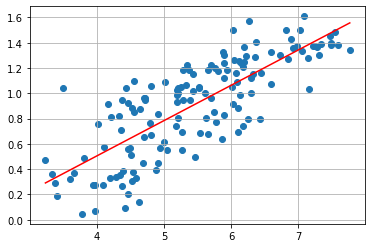

In [25]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,y) 


y_predict = reg.predict(X)

plt.plot(X, y_predict, c='r')
plt.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Elbow Method</h1>
</div>

# data

In [26]:
data1 = data.copy()
X = data1.drop(columns=['Country or region','Score','Region','Overall rank'])
region = data1['Country or region']

X

GDP per capita  Social support  Healthy life expectancy  \
0             1.340           1.587                    0.986   
1             1.383           1.573                    0.996   
2             1.488           1.582                    1.028   
3             1.380           1.624                    1.026   
4             1.396           1.522                    0.999   
..              ...             ...                      ...   
147           1.041           1.145                    0.538   
149           0.191           0.560                    0.495   
150           0.287           1.163                    0.463   
151           0.359           0.711                    0.614   
152           0.476           0.885                    0.499   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.596       0.153                      0.393   
1                           0.592       0.252                      0.410   
2                           0.603       0.271                      0.341   
3                           0.591       0.354                      0.118   
4                           0.557       0.322                      0.298   
..                            ...         ...                        ...   
147                         0.455       0.025                      0.100   
149                         0.443       0.218                      0.089   
150                         0.143       0.108                      0.077   
151                         0.555       0.217                      0.411   
152                         0.417       0.276                      0.147   

    mean_year_school_2019  
0                    12.8  
1                    12.6  
2                    12.9  
3                    12.8  
4                    12.4  
..                    ...  
147                   3.2  
149                   6.1  
150                   3.9  
151                   4.3  
152                   4.8  

[144 rows x 7 columns]

In [27]:
pd.set_option('display.max_rows', None)
X = X.drop(index=108)
region = region.drop(index=108)
X["GDP per capita"] = X["GDP per capita"].astype('float')
X["Social support"] = X["Social support"].astype('float')
X["Healthy life expectancy"] = X["Healthy life expectancy"].astype('float')
X["Freedom to make life choices"] = X["Freedom to make life choices"].astype('float')
X["Generosity"] = X["Generosity"].astype('float')
X["Perceptions of corruption"] = X["Perceptions of corruption"].astype('float')
X["mean_year_school_2019"] = X["mean_year_school_2019"].astype('float')


In [28]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.7990795578570626
2 : 1.4762465566301182
3 : 1.0813612084645696
4 : 0.8360745043773077
5 : 0.7104875604801404
6 : 0.6287006758414534
7 : 0.5697187259370885
8 : 0.538380663923533
9 : 0.5200800999522986


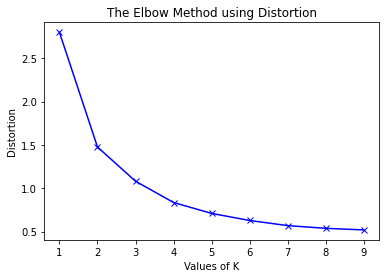

In [30]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [31]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1470.1045485874129
2 : 390.08581888861994
3 : 202.66643810986767
4 : 117.52716391257182
5 : 87.55948687649082
6 : 65.94073069089025
7 : 54.22678622125586
8 : 49.113979344794494
9 : 44.806032896854724


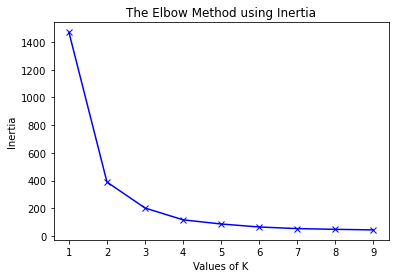

In [32]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">KMEANS</h1>
</div>

In [33]:
# 3 et 2

In [34]:
kmeanModel = KMeans(n_clusters=3).fit(X)
kmeanModel.fit(X)
y = kmeanModel.predict(X)


In [35]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">TSNE</h1>
</div>

In [36]:
from sklearn.manifold import TSNE

model = TSNE(n_components=3, random_state=0)
tab = model.fit_transform(X)


In [37]:
bonheur = {}
bonheur['axe1'] = tab[:,0]
bonheur['axe2'] = tab[:,1]
bonheur['axe3'] = tab[:,2]
bonheur['label'] = y
bonheur['region'] = region

df2 = pd.DataFrame(bonheur)



In [38]:
df2

axe1        axe2        axe3  label                   region
0    -22.944962  177.202057   17.295612      1                  Finland
1     34.780308   39.752705  118.136795      1                  Denmark
2    -35.053455   51.423344  163.546829      1                   Norway
3     46.275295    0.740279  150.779846      1                  Iceland
4    -19.668499  110.565620  110.314903      1              Netherlands
5     -0.424508   79.131737  191.698624      1              Switzerland
6    -45.553207   86.395645   79.912910      1                   Sweden
7    -80.439224   39.140228  155.487320      1              New Zealand
8    -33.818985  104.492027  164.358185      1                   Canada
9     -2.273243   -1.779894  140.505692      1                  Austria
10   -55.837978   38.079750  113.759315      1                Australia
11    66.770264 -131.472748 -100.315674      0               Costa Rica
12    19.239033   39.728611  167.370651      1                   Israel
13    -2.981561  -24.226690   65.010582      1               Luxembourg
14  -111.272766   36.433594  111.990158      1           United Kingdom
15     8.332975   78.916199  137.106018      1                  Ireland
16   -13.912591   20.127993  206.303436      1                  Germany
17   -10.659857  -39.255615  111.041763      1                  Belgium
18   -84.010262   52.386051   74.674355      1            United States
19   -13.910526   38.839596  124.650093      1           Czech Republic
20    32.955101  -12.172384   97.112740      1     United Arab Emirates
21    67.516838   54.643085   66.530830      1                    Malta
22  -106.023514   17.911226  -39.913517      0                   Mexico
23   105.798691   80.017578   62.304417      1                   France
25    70.531776 -137.892197   39.412384      0                    Chile
26   -43.869480  106.444580    4.185926      1                Guatemala
27    45.546234   16.706182    5.302445      0             Saudi Arabia
29    -8.478459   55.337353  -64.543518      1                    Spain
30    72.907600  -57.256733  -36.032661      0                   Panama
31    42.501106  -14.218765  -33.812714      0                   Brazil
32    70.727562   98.591652   89.215614      1                  Uruguay
33   -45.648308  -16.849564  -23.464569      0                Singapore
34   -69.497986   69.142387  -11.392671      1              El Salvador
35    19.174427   20.851011  -58.949322      0                    Italy
36   141.609299   70.767776  -31.450312      1                  Bahrain
37   103.742683   94.882187   12.173679      1                 Slovakia
39    44.403526   98.894295 -113.336967      1                   Poland
40   -68.238510  137.288849   64.040764      1               Uzbekistan
41     5.349693  -13.823792    0.352456      0                Lithuania
42   -71.775566   -9.225062  118.137917      1                 Colombia
43    68.561646 -102.144501   74.421143      0                 Slovenia
44    28.082474   73.810265  -11.475507      1                Nicaragua
45    33.740582  106.468521  -37.625721      1                   Kosovo
46   -21.545156    4.613670   94.239632      1                Argentina
47   101.153206  -12.005110  -42.391403      0                  Romania
48   -60.249245  -60.115387   -8.079958      0                   Cyprus
49   -39.165955  -31.605398   24.128790      0                  Ecuador
50   -60.677536   81.766556  128.482803      1                   Kuwait
51    -5.921498   58.346603   81.451790      1                 Thailand
52  -116.329720   83.297981   63.491505      1                   Latvia
53   114.524361   26.584997   -6.040746      0              South Korea
54   -47.809856   22.249704  -97.308937      0                  Estonia
55   -51.262138   -7.321240  158.651993      1                  Jamaica
56   -81.104805  -85.072342  -48.475677      0                Mauritius
57    23.963861   22.973402   65.100708      1     

<AxesSubplot:xlabel='axe1', ylabel='axe2'>

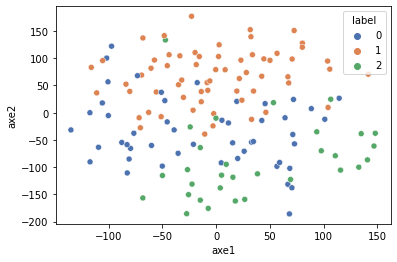

In [39]:
sns.scatterplot(data=df2, x="axe1", y="axe2",hue="label" , palette="deep")


In [40]:
import plotly.express as px

fig = px.scatter_3d(df2, x='axe1', y='axe2', z='axe3',
              color='label',text="region" )
fig.show()

In [41]:
df2

axe1        axe2        axe3  label                   region
0    -22.944962  177.202057   17.295612      1                  Finland
1     34.780308   39.752705  118.136795      1                  Denmark
2    -35.053455   51.423344  163.546829      1                   Norway
3     46.275295    0.740279  150.779846      1                  Iceland
4    -19.668499  110.565620  110.314903      1              Netherlands
5     -0.424508   79.131737  191.698624      1              Switzerland
6    -45.553207   86.395645   79.912910      1                   Sweden
7    -80.439224   39.140228  155.487320      1              New Zealand
8    -33.818985  104.492027  164.358185      1                   Canada
9     -2.273243   -1.779894  140.505692      1                  Austria
10   -55.837978   38.079750  113.759315      1                Australia
11    66.770264 -131.472748 -100.315674      0               Costa Rica
12    19.239033   39.728611  167.370651      1                   Israel
13    -2.981561  -24.226690   65.010582      1               Luxembourg
14  -111.272766   36.433594  111.990158      1           United Kingdom
15     8.332975   78.916199  137.106018      1                  Ireland
16   -13.912591   20.127993  206.303436      1                  Germany
17   -10.659857  -39.255615  111.041763      1                  Belgium
18   -84.010262   52.386051   74.674355      1            United States
19   -13.910526   38.839596  124.650093      1           Czech Republic
20    32.955101  -12.172384   97.112740      1     United Arab Emirates
21    67.516838   54.643085   66.530830      1                    Malta
22  -106.023514   17.911226  -39.913517      0                   Mexico
23   105.798691   80.017578   62.304417      1                   France
25    70.531776 -137.892197   39.412384      0                    Chile
26   -43.869480  106.444580    4.185926      1                Guatemala
27    45.546234   16.706182    5.302445      0             Saudi Arabia
29    -8.478459   55.337353  -64.543518      1                    Spain
30    72.907600  -57.256733  -36.032661      0                   Panama
31    42.501106  -14.218765  -33.812714      0                   Brazil
32    70.727562   98.591652   89.215614      1                  Uruguay
33   -45.648308  -16.849564  -23.464569      0                Singapore
34   -69.497986   69.142387  -11.392671      1              El Salvador
35    19.174427   20.851011  -58.949322      0                    Italy
36   141.609299   70.767776  -31.450312      1                  Bahrain
37   103.742683   94.882187   12.173679      1                 Slovakia
39    44.403526   98.894295 -113.336967      1                   Poland
40   -68.238510  137.288849   64.040764      1               Uzbekistan
41     5.349693  -13.823792    0.352456      0                Lithuania
42   -71.775566   -9.225062  118.137917      1                 Colombia
43    68.561646 -102.144501   74.421143      0                 Slovenia
44    28.082474   73.810265  -11.475507      1                Nicaragua
45    33.740582  106.468521  -37.625721      1                   Kosovo
46   -21.545156    4.613670   94.239632      1                Argentina
47   101.153206  -12.005110  -42.391403      0                  Romania
48   -60.249245  -60.115387   -8.079958      0                   Cyprus
49   -39.165955  -31.605398   24.128790      0                  Ecuador
50   -60.677536   81.766556  128.482803      1                   Kuwait
51    -5.921498   58.346603   81.451790      1                 Thailand
52  -116.329720   83.297981   63.491505      1                   Latvia
53   114.524361   26.584997   -6.040746      0              South Korea
54   -47.809856   22.249704  -97.308937      0                  Estonia
55   -51.262138   -7.321240  158.651993      1                  Jamaica
56   -81.104805  -85.072342  -48.475677      0                Mauritius
57    23.963861   22.973402   65.100708      1     

# je recupere les codes à 3 lettres des pays

In [42]:
pays = pd.read_csv("csv/sql-pays.csv")

In [43]:


pays["nom_en_gb"] = pays["nom_en_gb"].astype('string')
pays["alpha3"] = pays["alpha3"].astype('string')

pays['alpha3']

1      AFG
2      ALB
3      ATA
4      DZA
5      ASM
6      AND
7      AGO
8      ATG
9      AZE
10     ARG
11     AUS
12     AUT
13     BHS
14     BHR
15     BGD
16     ARM
17     BRB
18     BEL
19     BMU
20     BTN
21     BOL
22     BIH
23     BWA
24     BVT
25     BRA
26     BLZ
27     IOT
28     SLB
29     VGB
30     BRN
31     BGR
32     MMR
33     BDI
34     BLR
35     KHM
36     CMR
37     CAN
38     CPV
39     CYM
40     CAF
41     LKA
42     TCD
43     CHL
44     CHN
45     TWN
46     CXR
47     CCK
48     COL
49     COM
50     MYT
51     COG
52     COD
53     COK
54     CRI
55     HRV
56     CUB
57     CYP
58     CZE
59     BEN
60     DNK
61     DMA
62     DOM
63     ECU
64     SLV
65     GNQ
66     ETH
67     ERI
68     EST
69     FRO
70     FLK
71     SGS
72     FJI
73     FIN
74     ALA
75     FRA
76     GUF
77     PYF
78     ATF
79     DJI
80     GAB
81     GEO
82     GMB
83     PSE
84     DEU
85     GHA
86     GIB
87     KIR
88     GRC
89     GRL
90     GRD
91     GLP

In [44]:

# df2['code'] = df2['region'].apply(lambda x:  pays[pays['nom_en_gb'] == x]['alpha3'], axis=0)

tab_pays = []

for index, row in df2.iterrows():
    
    bol = True
    
    for index, row1 in pays.iterrows():
        
        if row1['nom_en_gb'] == row['region'] :
            
            tab_pays.append(row1['alpha3'])
            bol = False
            
    if bol:
        
        tab_pays.append(None)

In [45]:
len(tab_pays)

143

In [46]:
df2['code'] = " "
df2['code'] = tab_pays

In [47]:
df2[df2['code'].isnull()]

axe1        axe2       axe3  label                   region  code
45    33.740582  106.468521 -37.625721      1                   Kosovo  None
53   114.524361   26.584997  -6.040746      0              South Korea  None
67     2.206555  103.324173  48.043789      1                   Russia  None
69    21.546881   62.829456  35.033329      1                   Serbia  None
70     2.737332  124.775894  -8.724469      1                  Moldova  None
71    80.276215  127.786201  45.790165      1                    Libya  None
72   -30.501450   28.172195  57.312222      1               Montenegro  None
98   148.152695  -37.725891  -0.485035      2              Ivory Coast  None
102  -57.497360   96.751228 -49.915623      1      Congo (Brazzaville)  None
104  -18.581102   88.383087 -28.257605      1                     Laos  None
109 -109.577599  -63.419811  -9.989317      0  Palestinian Territories  None
116  -27.488424 -185.560760 -47.186474      2                     Iran  None
126   80.206421  120.322754 -51.287926      1         Congo (Kinshasa)  None
152  110.922745  -79.094604  37.332958      2                 Tanzania  None

In [48]:
df2['code'][df2['region'] == "Kosovo"] = "CS-KM"
df2['code'][df2['region'] == "South Korea"] = "KOR"
df2['code'][df2['region'] == "South Korea"] = "KOR"
df2['code'][df2['region'] == "Russia"] = "RUS"
df2['code'][df2['region'] == "Serbia"] = "SRB"
df2['code'][df2['region'] == "Moldova"] = "MDA"
df2['code'][df2['region'] == "Libya"] = "LBY"
df2['code'][df2['region'] == "Montenegro"] = "MNE"
df2['code'][df2['region'] == "Ivory Coast"] = "CIV"
df2['code'][df2['region'] == "Congo (Brazzaville)"] = "COG"
df2['code'][df2['region'] == "Laos"] = "LAO"
df2['code'][df2['region'] == "Palestinian Territories"] = "PSE"
df2['code'][df2['region'] == "Iran"] = "IRN"
df2['code'][df2['region'] == "Congo (Kinshasa)"] = "COD"
df2['code'][df2['region'] == "Tanzania"] = "TZA"
df2['code'][df2['region'] == "Central African Republic"] = "CAF"
df2['code'][df2['region'] == "South Sudan"] = "SSD"



/tmp/ipykernel_9383/1999293965.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9383/1999293965.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9383/1999293965.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_9383/1999293965.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [49]:
df2[df2['code'].isnull()]

Empty DataFrame
Columns: [axe1, axe2, axe3, label, region, code]
Index: []

In [50]:
df2

axe1        axe2        axe3  label                   region   code
0    -22.944962  177.202057   17.295612      1                  Finland    FIN
1     34.780308   39.752705  118.136795      1                  Denmark    DNK
2    -35.053455   51.423344  163.546829      1                   Norway    NOR
3     46.275295    0.740279  150.779846      1                  Iceland    ISL
4    -19.668499  110.565620  110.314903      1              Netherlands    NLD
5     -0.424508   79.131737  191.698624      1              Switzerland    CHE
6    -45.553207   86.395645   79.912910      1                   Sweden    SWE
7    -80.439224   39.140228  155.487320      1              New Zealand    NZL
8    -33.818985  104.492027  164.358185      1                   Canada    CAN
9     -2.273243   -1.779894  140.505692      1                  Austria    AUT
10   -55.837978   38.079750  113.759315      1                Australia    AUS
11    66.770264 -131.472748 -100.315674      0               Costa Rica    CRI
12    19.239033   39.728611  167.370651      1                   Israel    ISR
13    -2.981561  -24.226690   65.010582      1               Luxembourg    LUX
14  -111.272766   36.433594  111.990158      1           United Kingdom    GBR
15     8.332975   78.916199  137.106018      1                  Ireland    IRL
16   -13.912591   20.127993  206.303436      1                  Germany    DEU
17   -10.659857  -39.255615  111.041763      1                  Belgium    BEL
18   -84.010262   52.386051   74.674355      1            United States    USA
19   -13.910526   38.839596  124.650093      1           Czech Republic    CZE
20    32.955101  -12.172384   97.112740      1     United Arab Emirates    ARE
21    67.516838   54.643085   66.530830      1                    Malta    MLT
22  -106.023514   17.911226  -39.913517      0                   Mexico    MEX
23   105.798691   80.017578   62.304417      1                   France    FRA
25    70.531776 -137.892197   39.412384      0                    Chile    CHL
26   -43.869480  106.444580    4.185926      1                Guatemala    GTM
27    45.546234   16.706182    5.302445      0             Saudi Arabia    SAU
29    -8.478459   55.337353  -64.543518      1                    Spain    ESP
30    72.907600  -57.256733  -36.032661      0                   Panama    PAN
31    42.501106  -14.218765  -33.812714      0                   Brazil    BRA
32    70.727562   98.591652   89.215614      1                  Uruguay    URY
33   -45.648308  -16.849564  -23.464569      0                Singapore    SGP
34   -69.497986   69.142387  -11.392671      1              El Salvador    SLV
35    19.174427   20.851011  -58.949322      0                    Italy    ITA
36   141.609299   70.767776  -31.450312      1                  Bahrain    BHR
37   103.742683   94.882187   12.173679      1                 Slovakia    SVK
39    44.403526   98.894295 -113.336967      1                   Poland    POL
40   -68.238510  137.288849   64.040764      1               Uzbekistan    UZB
41     5.349693  -13.823792    0.352456      0                Lithuania    LTU
42   -71.775566   -9.225062  118.137917      1                 Colombia    COL
43    68.561646 -102.144501   74.421143      0                 Slovenia    SVN
44    28.082474   73.810265  -11.475507      1                Nicaragua    NIC
45    33.740582  106.468521  -37.625721      1                   Kosovo  CS-KM
46   -21.545156    4.613670   94.239632      1                Argentina    ARG
47   101.153206  -12.005110  -42.391403      0                  Romania    ROU
48   -60.249245  -60.115387   -8.079958      0                   Cyprus    CYP
49   -39.165955  -31.605398   24.128790      0                  Ecuador    ECU
50   -60.677536   81.766556  128.482803      1                   Kuwait    KWT
51    -5.921498   58.346603   81.451790      1                 Thailand    THA
52  -116.329720   83.297981   63.491505      1               

In [51]:
df2[df2['region'].str.contains('Guyane')]

Empty DataFrame
Columns: [axe1, axe2, axe3, label, region, code]
Index: []

In [52]:
df3 = df2.copy()

In [53]:
df3 = df3.drop(columns=['axe1','axe2','axe3','region'])


In [54]:
df3 = df3[['code','label']]
df3

code  label
0      FIN      1
1      DNK      1
2      NOR      1
3      ISL      1
4      NLD      1
5      CHE      1
6      SWE      1
7      NZL      1
8      CAN      1
9      AUT      1
10     AUS      1
11     CRI      0
12     ISR      1
13     LUX      1
14     GBR      1
15     IRL      1
16     DEU      1
17     BEL      1
18     USA      1
19     CZE      1
20     ARE      1
21     MLT      1
22     MEX      0
23     FRA      1
25     CHL      0
26     GTM      1
27     SAU      0
29     ESP      1
30     PAN      0
31     BRA      0
32     URY      1
33     SGP      0
34     SLV      1
35     ITA      0
36     BHR      1
37     SVK      1
39     POL      1
40     UZB      1
41     LTU      0
42     COL      1
43     SVN      0
44     NIC      1
45   CS-KM      1
46     ARG      1
47     ROU      0
48     CYP      0
49     ECU      0
50     KWT      1
51     THA      1
52     LVA      1
53     KOR      0
54     EST      0
55     JAM      1
56     MUS      0
57     JPN      1
58     HND      0
59     KAZ      1
60     BOL      0
61     HUN      0
62     PRY      0
64     PER      1
65     PRT      0
66     PAK      1
67     RUS      1
68     PHL      0
69     SRB      1
70     MDA      1
71     LBY      1
72     MNE      1
73     TJK      0
74     HRV      0
76     DOM      1
77     BIH      1
78     TUR      1
79     MYS      1
80     BLR      0
81     GRC      0
82     MNG      1
84     NGA      0
85     KGZ      2
86     TKM      1
87     DZA      0
88     MAR      0
89     AZE      0
90     LBN      0
91     IDN      2
92     CHN      0
93     VNM      1
95     CMR      2
96     BGR      2
97     GHA      1
98     CIV      2
99     NPL      0
100    JOR      0
101    BEN      2
102    COG      1
103    GAB      1
104    LAO      1
105    ZAF      2
106    ALB      0
107    VEN      2
109    PSE      0
110    SEN      2
112    NAM      1
113    NER      1
114    BFA      2
115    ARM      1
116    IRN      2
117    GIN      0
118    GEO      2
119    GMB      2
120    KEN      0
121    MRT      0
122    MOZ      0
123    TUN      0
124    BGD      2
125    IRQ      2
126    COD      1
127    MLI      2
128    SLE      2
129    LKA      1
130    MMR      2
131    TCD      0
132    UKR      0
133    ETH      0
134    SWZ      0
135    UGA      2
136    EGY      0
137    ZMB      2
138    TGO      2
139    IND      2
140    LBR      0
141    COM      2
142    MDG      0
143    LSO      2
144    BDI      0
145    ZWE      2
146    HTI      2
147    BWA      2
149    MWI      2
150    YEM      2
151    RWA      2
152    TZA      2

In [55]:
df3.to_csv('csv/classement_bonheur1.csv',index = False)

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Carte</h1>
</div>

In [56]:
import json

with open('json/country.json') as mon_fichier:
    country = json.load(mon_fichier)



In [57]:
import pandas as pd
import folium




state_geo = country
state_data = pd.read_csv("csv/classement_bonheur1.csv")

# # print(state_geo)

m = folium.Map()

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["code", "label"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="label Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m


In [58]:
m.save("carte_du_bonheur.html")